In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv('data/city_data.csv')
ride_data = pd.read_csv('data/ride_data.csv')
# Combine the data into a single dataset
ride_data_complete = pd.merge(city_data, ride_data, how="right", on=["city", "city"])

# Display the data table for preview
ride_data_complete.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


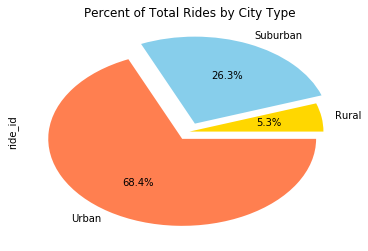

In [32]:
by_city = ride_data_complete.groupby("type")
rides_per_city = by_city["ride_id"].count()
color = ["gold","skyblue", "coral"]
explode = (0, 0.1, 0.1)
rides_per_city.plot(kind="pie", colors=color, explode= explode, autopct="%1.1f%%")
plt.title("Percent of Total Rides by City Type")
plt.show()

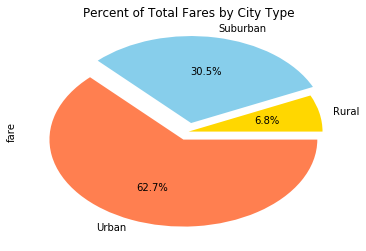

In [31]:
by_city = ride_data_complete.groupby("type")
fare_per_city = by_city["fare"].sum()
color = ["gold","skyblue", "coral"]
explode = (0, 0.1, 0.1)
fare_per_city.plot(kind="pie", colors=color, explode=explode, autopct="%1.1f%%")
plt.title("Percent of Total Fares by City Type")
plt.show()

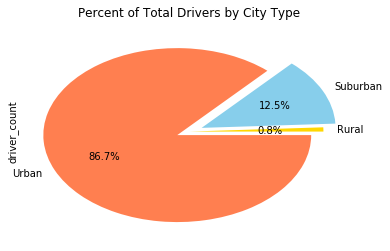

In [33]:
by_city = ride_data_complete.groupby(["type"])
driver_per_city = by_city["driver_count"].sum() 
color = ["gold","skyblue", "coral"]
explode = (0, 0.1, 0.1)
driver_per_city.plot(kind="pie", colors=color, explode=explode, autopct="%1.1f%%")
plt.title("Percent of Total Drivers by City Type")
plt.show()

## Bubble Plot of Ride Sharing Data

In [10]:
urban = ride_data_complete[ride_data_complete["type"] == "Urban"]
suburban = ride_data_complete[ride_data_complete["type"] == "Suburban"]
rural = ride_data_complete[ride_data_complete["type"] == "Rural"]
urban_ride_count = urban.groupby(["city"]).count()["ride_id"]
urban_avg_fare =urban.groupby(["city"]).mean()["fare"]
urban_driver_count =urban.groupby(["city"]).mean()["driver_count"]

suburban_ride_count = suburban.groupby(["city"]).count()["ride_id"]
suburban_avg_fare =suburban.groupby(["city"]).mean()["fare"]
suburban_driver_count =suburban.groupby(["city"]).mean()["driver_count"]

rural_ride_count = rural.groupby(["city"]).count()["ride_id"]
rural_avg_fare =rural.groupby(["city"]).mean()["fare"]
rural_driver_count =rural.groupby(["city"]).mean()["driver_count"]


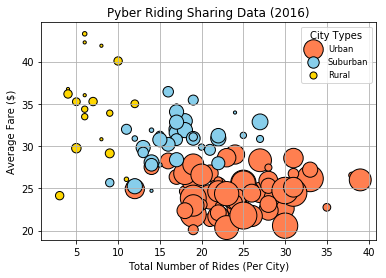

In [18]:
plt.scatter(urban_ride_count, urban_avg_fare ,s= urban_driver_count*10 ,c="coral", label="Urban", marker= "o", edgecolor="black")

plt.scatter(suburban_ride_count, suburban_avg_fare ,s= suburban_driver_count*10 ,c="skyblue", label="Suburban", marker= "o", edgecolor="black")

plt.scatter(rural_ride_count, rural_avg_fare ,s= rural_driver_count*10 ,c="gold", label="Rural", marker= "o", edgecolor="black")
plt.title("Pyber Riding Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend(title="City Types", loc="best", fontsize="small")
plt.show()